**The primary objective of the feature selection phase is to identify and retain a subset of the most informative features from the dataset. In this step, we outline the feature selection technique based on a pearson correlation  and the subsequent selection of the high correlated features.**

A correlation matrix was calculated to assess the relationships between numerical features in the dataset. The correlation matrix provides insights into the strength and direction of linear relationships between pairs of features.

**Heat Map Visualization:**
A heat map was generated from the correlation matrix to visually represent the correlation coefficients. This facilitated the identification of patterns and relationships among features.

>Features were selected based on their correlation coefficients with the target variable or with the aim of capturing diverse and relevant information.-  -

## 1- import and reading data (with outlier and without it)

In [1]:
import sys

sys.path.append('../../../scripts/utilities')
from helper_functions import *

sys.path.append('../../../scripts/data_preprocessing')
from data_reduction import *

__with outlier__

In [2]:
base_path = '../../../data/processed_data/'
df1 = read_files('df_filling_missing_values_with_median_encoded_handle_noisy_normalized.csv', base_path=base_path)[0]

## 2- calculate correlation matrix

In [3]:
correlation_matrix = calculate_correlation_matrix(df1,method='pearson')
correlation_matrix

SEQN  RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  \
SEQN      1.000000  0.000993 -0.005641  0.009519  0.015414  0.015820   
RIDSTATR  0.000993  1.000000 -0.006361  0.032990 -0.033489 -0.028967   
RIAGENDR -0.005641 -0.006361  1.000000  0.028616 -0.014514 -0.010508   
RIDAGEYR  0.009519  0.032990  0.028616  1.000000  0.031248  0.062385   
RIDRETH1  0.015414 -0.033489 -0.014514  0.031248  1.000000  0.922144   
...            ...       ...       ...       ...       ...       ...   
URDFLOW1 -0.005043  0.043517 -0.062915  0.091868  0.016135  0.028683   
LBDB12    0.006419  0.022723  0.048738  0.123016 -0.004058  0.005954   
LBDB12SI  0.006220  0.023006  0.049583  0.124062 -0.003955  0.006204   
MCQ160L   0.012481  0.026169  0.031075  0.783616  0.047682  0.075022   
MCQ220    0.013427  0.025193  0.025191  0.749830  0.049357  0.079944   

          RIDEXMON  DMQMILIZ  DMDBORN4  DMDCITZN  ...    LBXBSE  LBDBSESI  \
SEQN     -0.007832 -0.000779  0.022537  0.013820  ... -0.014250 -0.014199   
RIDSTATR -0.182328  0.001609  0.016151  0.019358  ...  0.011082  0.010494   
RIAGENDR  0.014785  0.209048  0.015691  0.004174  ... -0.008348 -0.008264   
RIDAGEYR  0.009536 -0.287978  0.247125  0.086767  ...  0.227713  0.227981   
RIDRETH1 -0.009474 -0.025650  0.006512 -0.069923  ...  0.031222  0.031359   
...            ...       ...       ...       ...  ...       ...       ...   
URDFLOW1  0.006601 -0.029513  0.052366  0.017070  ...  0.062731  0.062848   
LBDB12    0.007303 -0.014494  0.077625  0.034834  ...  0.030463  0.030349   
LBDB12SI  0.008286 -0.014746  0.077965  0.035576  ...  0.030478  0.030364   
MCQ160L   0.007147 -0.202436  0.276300  0.147278  ...  0.251967  0.252276   
MCQ220    0.000566 -0.172956  0.300500  0.160495  ...  0.251957  0.252266   

            LBXBMN  LBDBMNSI   URXVOL1  URDFLOW1    LBDB12  LBDB12SI  \
SEQN     -0.005879 -0.005320 -0.003473 -0.005043  0.006419  0.006220   
RIDSTATR  0.022795  0.022642  0.048256  0.043517  0.022723  0.023006   
RIAGENDR  0.124506  0.124509 -0.120447 -0.062915  0.048738  0.049583   
RIDAGEYR -0.109214 -0.108711  0.025224  0.091868  0.123016  0.124062   
RIDRETH1 -0.059428 -0.059563 -0.019446  0.016135 -0.004058 -0.003955   
...            ...       ...       ...       ...       ...       ...   
URDFLOW1 -0.039026 -0.039025  0.526406  1.000000  0.012996  0.013968   
LBDB12   -0.017225 -0.017086 -0.012684  0.012996  1.000000  0.998738   
LBDB12SI -0.016348 -0.016208 -0.011557  0.013968  0.998738  1.000000   
MCQ160L  -0.109936 -0.109419  0.064056  0.126221  0.099682  0.100991   
MCQ220   -0.098959 -0.098462  0.071394  0.128665  0.094655  0.095940   

           MCQ160L    MCQ220  
SEQN      0.012481  0.013427  
RIDSTATR  0.026169  0.025193  
RIAGENDR  0.031075  0.025191  
RIDAGEYR  0.783616  0.749830  
RIDRETH1  0.047682  0.049357  
...            ...       ...  
URDFLOW1  0.126221  0.128665  
LBDB12    0.099682  0.094655  
LBDB12SI  0.100991  0.095940  
MCQ160L   1.000000  0.962187  
MCQ220    0.962187  1.000000  

[372 rows x 372 columns]

## 3- use the Heat Map display method to show the correlation

In [4]:
top_correlations = get_top_correlations(correlation_matrix,n=100)
print(top_correlations)

LBDSALSI   LBXSAL       1.000000
URXUMS     URXUMA       1.000000
WTSH2YR.y  WTSH2YR.x    1.000000
LBDSGBSI   LBXSGB       1.000000
LBDSTBSI   LBXSTB       1.000000
                          ...   
DR1TPHOS   DR1TPROT     0.888447
OHX11CTC   OHX06CTC     0.886866
OHX09CTC   OHX08CTC     0.885747
DR1TSELE   DR1TPROT     0.884052
OHX09TC    OHX08TC      0.883403
Length: 100, dtype: float64


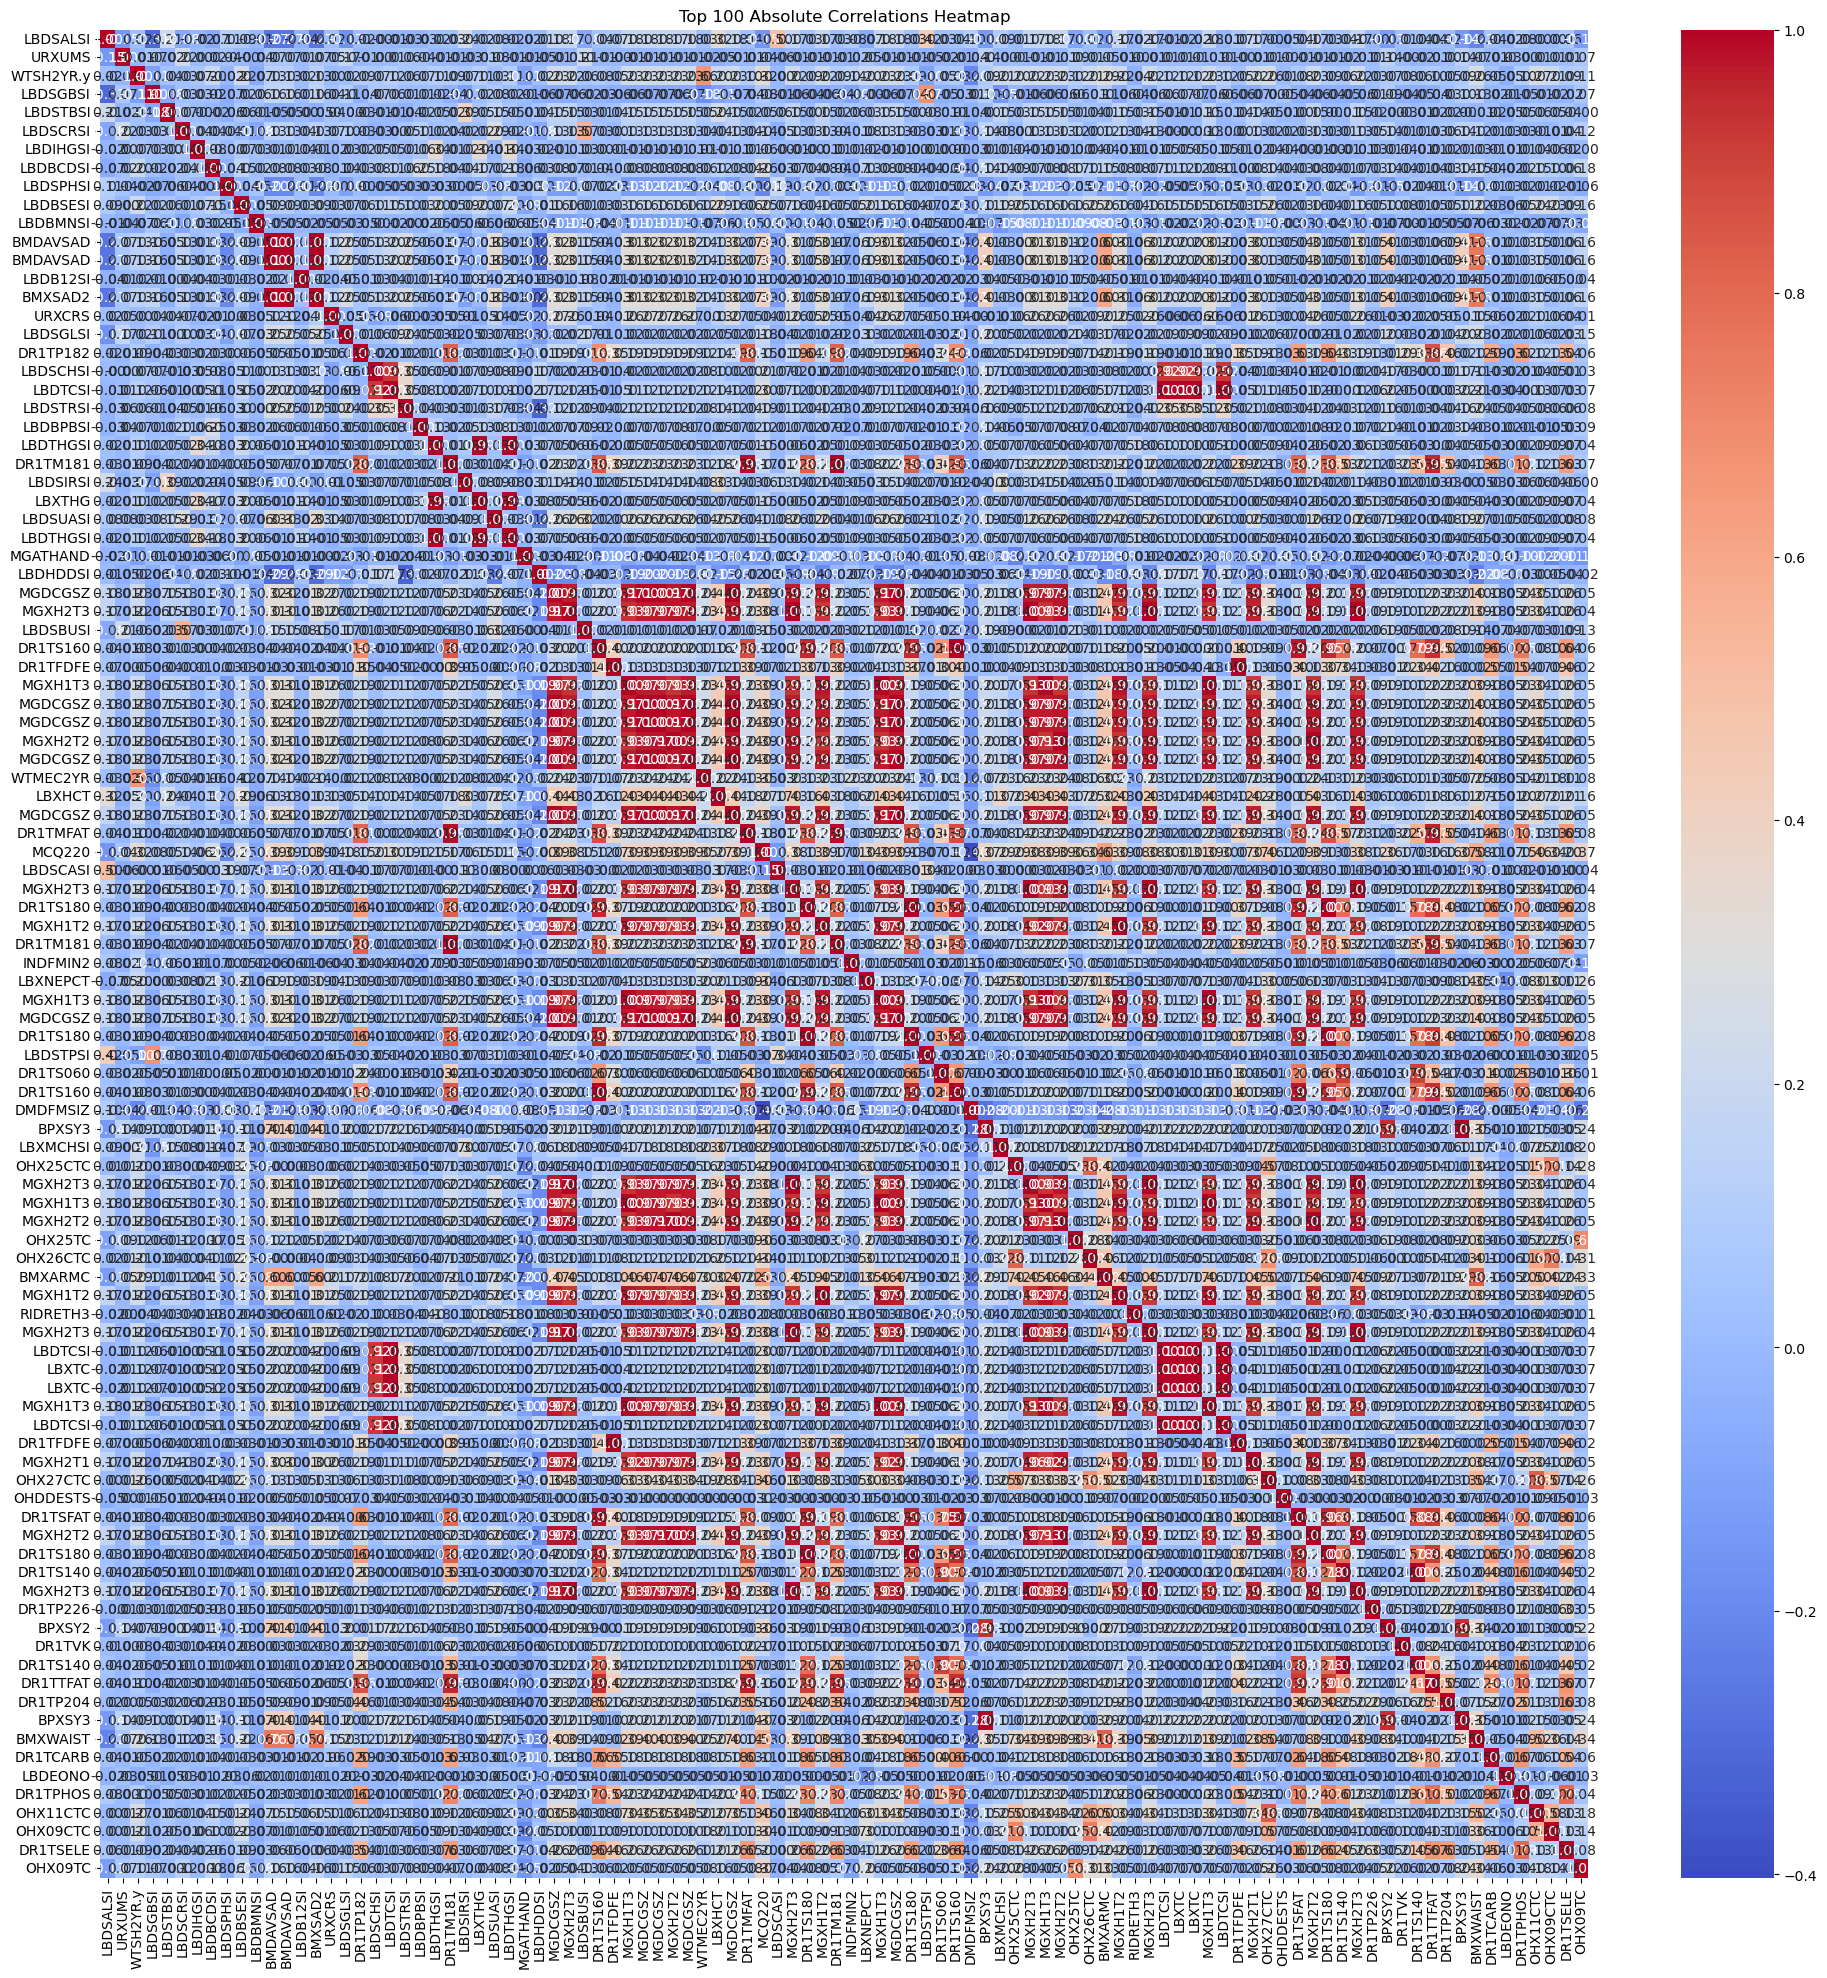

<Axes: title={'center': 'Top 100 Absolute Correlations Heatmap'}>

In [7]:
filtered_dataframe = filter_dataframe(df1, top_correlations)
create_heatmap(filtered_dataframe)

## 3- Selecting feature from high correlation pairs

In [8]:
highly_correlated_attributes = get_highly_correlated_attributes(correlation_matrix, threshold=0.5)
len(highly_correlated_attributes)

208

## 4- extract dataset with high correlation columns

In [9]:
df_highly_correlation=filter_dataset_with_columns(df1,highly_correlated_attributes)
df_highly_correlation

C:\Users\FSG\projects\PDRM\notebooks\data_preprocessing\data_reduction\../../../scripts/data_preprocessing\data_reduction.py:45: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return df.loc[:, selected_attributes]


DMDHRMAR  OHX05TC    URDACT  LBDBPBSI  LBDIHGSI    LBXTHG  DR1TPFAT  \
0           0.6     0.75  0.001202  0.021277  0.000000  0.006495  0.048388   
1           0.0     0.25  0.033977  0.048024  0.000000  0.021866  0.112380   
2           0.0     0.25  0.001147  0.040729  0.014862  0.023165  0.070990   
3           0.0     0.00  0.002316  0.009119  0.018773  0.014722  0.052707   
4           0.0     0.25  0.019252  0.021277  0.000000  0.006495  0.006922   
...         ...      ...       ...       ...       ...       ...       ...   
10170       0.0     0.75  0.000426  0.021277  0.000000  0.006495  0.167706   
10171       0.0     0.00  0.000841  0.008511  0.000000  0.000000  0.029524   
10172       0.4     0.25  0.000547  0.021884  0.414581  0.136393  0.206196   
10173       0.0     0.00  0.000558  0.019453  0.000000  0.017969  0.079151   
10174       0.0     0.00  0.000493  0.021277  0.000000  0.006495  0.130805   

       LBDBGELC   OHX32TC  DMDHRBR4  ...  LBXSATSI  OHX20TC  OHX26CTC  \
0           1.0  0.666667       0.0  ...  0.018868     0.75  0.416667   
1           1.0  0.666667       0.0  ...  0.043396     1.00  0.666667   
2           1.0  0.666667       0.0  ...  0.018868     0.25  0.666667   
3           1.0  0.666667       0.0  ...  0.026415     0.00  0.666667   
4           1.0  0.666667       0.0  ...  0.041509     0.75  0.666667   
...         ...       ...       ...  ...       ...      ...       ...   
10170       1.0  0.666667       0.0  ...  0.037736     0.25  0.666667   
10171       1.0  0.666667       0.0  ...  0.026415     0.75  0.000000   
10172       0.0  0.000000       1.0  ...  0.013208     0.25  0.666667   
10173       1.0  0.666667       1.0  ...  0.026415     0.00  0.000000   
10174       1.0  0.666667       1.0  ...  0.026415     0.00  0.666667   

       DMDFMSIZ  LBDSPHSI  OHX27TC  DR1TSODI  DR1TACAR  DR1TM201  DR1TTFAT  
0           0.4  0.274583     0.75  0.061079  0.001711  0.020992  0.096302  
1           0.6  0.230691     0.25  0.454074  0.000000  0.014920  0.226649  
2           0.2  0.263695     0.25  0.136844  0.000599  0.028452  0.120300  
3           0.6  0.230691     0.75  0.127584  0.000570  0.035219  0.106258  
4           0.2  0.285812     0.25  0.132588  0.000000  0.046495  0.100952  
...         ...       ...      ...       ...       ...       ...       ...  
10170       0.8  0.186798     0.25  0.375362  0.002852  0.111034  0.352876  
10171       0.6  0.230691     0.00  0.105135  0.013264  0.020125  0.095536  
10172       0.0  0.165022     0.25  0.254934  0.022021  0.145038  0.201138  
10173       0.6  0.230691     0.00  0.132588  0.000970  0.037474  0.120774  
10174       0.6  0.230691     0.25  0.168927  0.001711  0.034698  0.143386  

[10175 rows x 208 columns]

## 5- save dataframe

In [10]:
save_files([df_highly_correlation], 'df_filling_missing_values_with_median_encoded_handle_noisy_normalized_highly_correlated.csv', base_path='../../../data/processed_data/')

__without outlier__

In [9]:
df2 = read_files('df_filling_missing_values_with_median_encoded_handle_noisy_handle_outlier_normalized.csv', base_path=base_path)[0]

In [10]:
correlation_matrix = calculate_correlation_matrix(df2,method='pearson')
correlation_matrix

SEQN  RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  \
SEQN      1.000000  0.000993 -0.005641  0.009519  0.015414  0.015820   
RIDSTATR  0.000993  1.000000 -0.006361  0.032990 -0.033489 -0.028967   
RIAGENDR -0.005641 -0.006361  1.000000  0.028616 -0.014514 -0.010508   
RIDAGEYR  0.009519  0.032990  0.028616  1.000000  0.031248  0.062385   
RIDRETH1  0.015414 -0.033489 -0.014514  0.031248  1.000000  0.922144   
...            ...       ...       ...       ...       ...       ...   
LBDTHGLC -0.005531  0.074768 -0.005013 -0.236219 -0.086773 -0.110458   
URXVOL1  -0.003473  0.048256 -0.120447  0.025224 -0.019446 -0.009970   
URDFLOW1 -0.005043  0.043517 -0.062915  0.091868  0.016135  0.028683   
MCQ160L   0.012481  0.026169  0.031075  0.783616  0.047682  0.075022   
MCQ220    0.013427  0.025193  0.025191  0.749830  0.049357  0.079944   

          RIDEXMON  DMQMILIZ  DMDBORN4  DMDCITZN  ...     LBXTC   LBDTCSI  \
SEQN     -0.007832 -0.000779  0.022537  0.013820  ...  0.009427  0.009591   
RIDSTATR -0.182328  0.001609  0.016151  0.019358  ...  0.018652  0.017598   
RIAGENDR  0.014785  0.209048  0.015691  0.004174  ...  0.071722  0.072080   
RIDAGEYR  0.009536 -0.287978  0.247125  0.086767  ...  0.267170  0.265642   
RIDRETH1 -0.009474 -0.025650  0.006512 -0.069923  ...  0.007807  0.007885   
...            ...       ...       ...       ...  ...       ...       ...   
LBDTHGLC  0.053387  0.054917 -0.125940 -0.081397  ... -0.097139 -0.096317   
URXVOL1  -0.022515 -0.038682  0.026835  0.023517  ...  0.012346  0.012269   
URDFLOW1  0.006601 -0.029513  0.052366  0.017070  ...  0.045689  0.045209   
MCQ160L   0.007147 -0.202436  0.276300  0.147278  ...  0.307527  0.305956   
MCQ220    0.000566 -0.172956  0.300500  0.160495  ...  0.305540  0.303925   

            LBXTTG  WTSH2YR.y  LBDBCDLC  LBDTHGLC   URXVOL1  URDFLOW1  \
SEQN      0.019548  -0.002111 -0.008354 -0.005531 -0.003473 -0.005043   
RIDSTATR -0.002818   0.045730  0.080241  0.074768  0.048256  0.043517   
RIAGENDR -0.007907   0.009608 -0.034574 -0.005013 -0.120447 -0.062915   
RIDAGEYR  0.006436   0.247758 -0.352597 -0.236219  0.025224  0.091868   
RIDRETH1  0.006228  -0.035906 -0.057950 -0.086773 -0.019446  0.016135   
...            ...        ...       ...       ...       ...       ...   
LBDTHGLC -0.013576   0.005138  0.391530  1.000000 -0.028035 -0.043033   
URXVOL1  -0.008950   0.059913 -0.043073 -0.028035  1.000000  0.526406   
URDFLOW1 -0.004013   0.103104 -0.061748 -0.043033  0.526406  1.000000   
MCQ160L   0.013242   0.336614 -0.395386 -0.251524  0.064056  0.126221   
MCQ220    0.011302   0.321379 -0.388266 -0.247824  0.071394  0.128665   

           MCQ160L    MCQ220  
SEQN      0.012481  0.013427  
RIDSTATR  0.026169  0.025193  
RIAGENDR  0.031075  0.025191  
RIDAGEYR  0.783616  0.749830  
RIDRETH1  0.047682  0.049357  
...            ...       ...  
LBDTHGLC -0.251524 -0.247824  
URXVOL1   0.064056  0.071394  
URDFLOW1  0.126221  0.128665  
MCQ160L   1.000000  0.962187  
MCQ220    0.962187  1.000000  

[358 rows x 358 columns]

In [11]:
top_correlations = get_top_correlations(correlation_matrix,n=100)
print(top_correlations)

WTSH2YR.y  WTSH2YR.x    1.000000
URXUMS     URXUMA       1.000000
LBDSALSI   LBXSAL       1.000000
LBDSGBSI   LBXSGB       1.000000
LBDSTBSI   LBXSTB       1.000000
                          ...   
DR1TP183   DR1TPFAT     0.874727
DR1TS160   DR1TMFAT     0.871646
OHX27TC    OHX22TC      0.870168
DR1TVB6    DR1TNIAC     0.869919
DR1TPFAT   DR1TTFAT     0.862494
Length: 100, dtype: float64


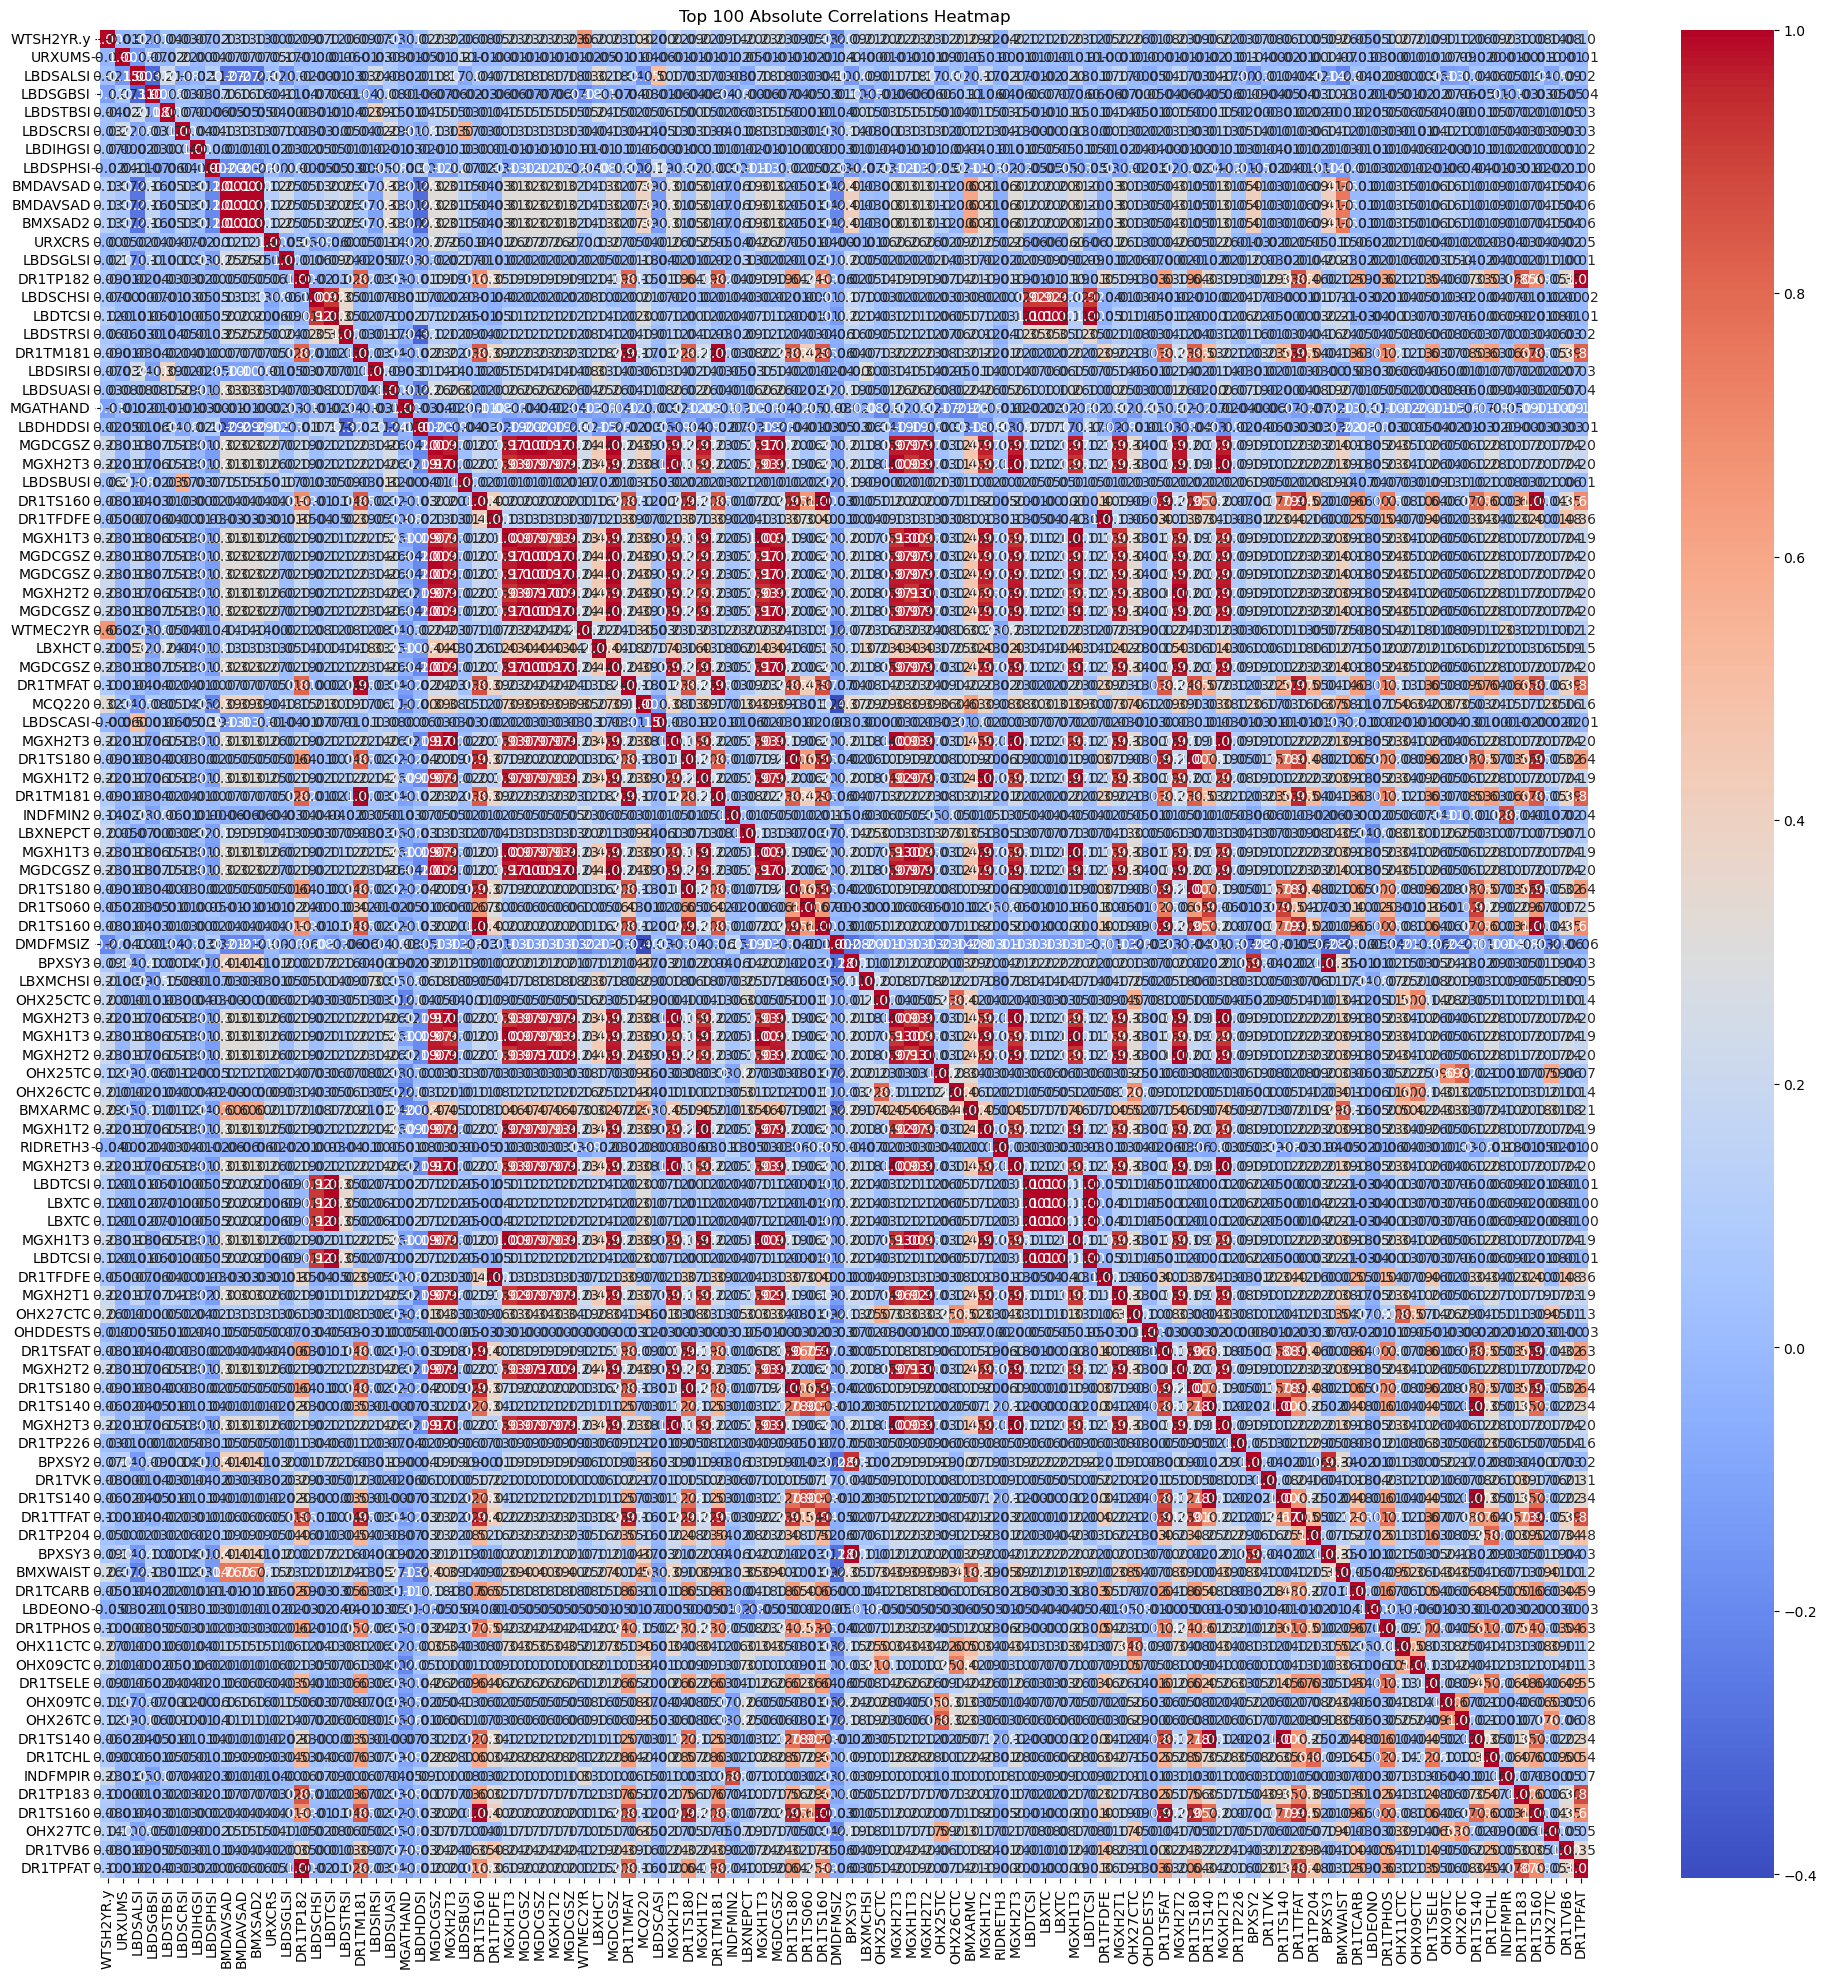

<Axes: title={'center': 'Top 100 Absolute Correlations Heatmap'}>

In [12]:
filtered_dataframe = filter_dataframe(df2, top_correlations)
create_heatmap(filtered_dataframe)

In [13]:
highly_correlated_attributes = get_highly_correlated_attributes(correlation_matrix, threshold=0.5)
len(highly_correlated_attributes)

200

In [14]:
df_highly_correlation=filter_dataset_with_columns(df1,highly_correlated_attributes)
df_highly_correlation

C:\Users\FSG\projects\PDRM\notebooks\data_preprocessing\data_reduction\../../../scripts/data_preprocessing\data_reduction.py:45: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return df.loc[:, selected_attributes]


LBDTHGLC   MGXH1T1  WTSH2YR.y  DR1TS120    URXUMS   LBDNENO  OHX11CTC  \
0           0.0  0.184516   0.105820  0.013105  0.000426  0.063492  0.416667   
1           0.0  0.367742   0.152503  0.049123  0.015916  0.277778  0.666667   
2           0.0  0.504516   0.359484  0.113926  0.001218  0.178571  0.666667   
3           0.0  0.117419   0.173127  0.034352  0.001645  0.166667  0.750000   
4           0.0  0.085161   0.105820  0.000341  0.026541  0.162698  1.000000   
...         ...       ...        ...       ...       ...       ...       ...   
10170       0.0  0.286452   0.105820  0.055600  0.000176  0.099206  0.666667   
10171       1.0  0.305806   0.051262  0.029088  0.000853  0.039683  0.000000   
10172       0.0  0.259355   0.179965  0.025111  0.000603  0.111111  0.666667   
10173       0.0  0.076129   0.082847  0.019467  0.000447  0.142857  0.000000   
10174       0.0  0.160000   0.030116  0.024391  0.000530  0.134921  0.666667   

         BMXBMI  OHX28CTC   DR1TVB2  ...  OHX29TC   LBDEONO  LBXSOSSI  \
0      0.206215  0.416667  0.041283  ...     0.75  0.046512  0.686047   
1      0.233051  1.000000  0.175454  ...     0.25  0.186047  0.325581   
2      0.237288  0.666667  0.059311  ...     0.25  0.093023  0.593023   
3      0.070621  0.000000  0.074215  ...     0.00  0.023256  0.488372   
4      0.107345  0.083333  0.058394  ...     0.75  0.046512  0.616279   
...         ...       ...       ...  ...      ...       ...       ...   
10170  0.175141  0.333333  0.148396  ...     0.25  0.046512  0.558140   
10171  0.053672  0.000000  0.057715  ...     0.75  0.046512  0.488372   
10172  0.309322  0.666667  0.068070  ...     0.25  0.023256  0.465116   
10173  0.056497  0.250000  0.058360  ...     0.00  0.069767  0.488372   
10174  0.101695  0.250000  0.103106  ...     0.00  0.046512  0.488372   

       DR1TM161  LBXNEPCT  MCQ220  OHDDESTS   OHX14TC  LBDSALSI  DR1TTFAT  
0      0.084298  0.403092     2.0       0.0  0.666667   0.53125  0.096302  
1      0.158678  0.594530     2.0       0.0  0.000000   0.71875  0.226649  
2      0.038160  0.711058     1.0       0.0  0.000000   0.40625  0.120300  
3      0.072512  0.602854     0.0       0.0  0.000000   0.59375  0.106258  
4      0.002731  0.717004     2.0       0.0  0.000000   0.59375  0.100952  
...         ...       ...     ...       ...       ...       ...       ...  
10170  0.245131  0.580262     2.0       0.0  0.000000   0.78125  0.352876  
10171  0.056055  0.160523     0.0       0.0  0.666667   0.59375  0.095536  
10172  0.066834  0.486326     2.0       0.0  0.000000   0.53125  0.201138  
10173  0.056126  0.376932     0.0       0.0  0.000000   0.59375  0.120774  
10174  0.029608  0.560048     0.0       0.0  0.000000   0.59375  0.143386  

[10175 rows x 200 columns]

In [15]:
save_files([df_highly_correlation], 'df_filling_missing_values_with_median_encoded_handle_noisy_handle_outlier_normalized_highly_correlated.csv', base_path=base_path)